# 第5章 統計的仮説検定

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
import math
import datetime as dt

import numpy as np
import scipy
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import output_notebook, show
#from bokeh.plotting import figure

sns.set(font_scale=1.5)
#plt.rcParams['font.family'] = 'IPAexGothic'

In [2]:
a = np.random.normal(size=50)
b = np.random.normal(size=50)
c = a * 0.5 + np.sqrt(0.75) * b
self_esteem = 10 * a + 50
social_skill = 10 * c + 50

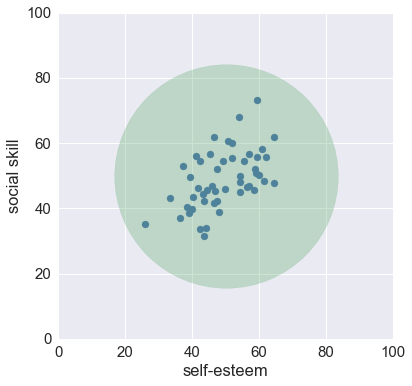

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=self_esteem, y=social_skill)
ax.scatter(x=50, y=50, s=50000, alpha=0.3)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('self-esteem')
ax.set_ylabel('social skill')

### 統計的仮説検定の手順

1. 母集団に関する帰無仮説と対立仮説 (両側or片側検定) を設定する
2. 検定統計量を選ぶ
3. 有意水準 $\alpha$ の値を求める
4. (データを収集した後) データから検定統計量の実現値を求める
5. 検定統計量の実現値が棄却域に入れば帰無仮説を棄却して，対立仮説を採択する．棄却域に入らなければ，帰無仮説を採択する

### 標準正規分布を用いた検定
1つの平均値の検定・母分散 $\sigma^2$ が既知

例題
- 過去のデータの蓄積から「心理学テスト」の得点は平均12，分散10の正規分布に従うことが知られている
- つまり，心理学テストの母集団分布は $X \sim N(12,10)$
- 指導法データの20人の心理学テスト得点は，この母集団からの無作為標本と考えてよいか？

In [4]:
population_mean = 12
population_var = 10

In [5]:
path = os.path.join('cache', 'shidouhou.csv')
df = pd.read_csv(path, encoding='cp932')
df['psych_test'].values

array([13, 14,  7, 12, 10,  6,  8, 15,  4, 14,  9,  6, 10, 12,  5, 12,  8,
        8, 12, 15])

帰無仮説・対立仮説の設定
- 帰無仮説 $H_{0}$ : $\mu = 12$ (心理学テストの母平均は12である)
- 対立仮説 $H_{1}$ : $\mu \neq 12$ (...は12ではない)

検定統計量としてZ統計量を選択

In [6]:
# Z統計量
z = (df['psych_test'].mean() - population_mean) / np.sqrt(population_var / len(df['psych_test']))
z

-2.8284271247461898

有意水準を5%に設定

In [7]:
alpha = 0.05

帰無仮説の棄却 or 採択の決定

In [8]:
# 下側確率となるZ値
prob_lower = scipy.stats.norm.ppf(q=alpha/2)
# 上側確率となるZ値
prob_upper = scipy.stats.norm.ppf(q=1-alpha/2)
prob_lower, prob_upper

(-1.9599639845400545, 1.959963984540054)

In [9]:
# 帰無仮説が採択されるか
significant = prob_lower <= z <= prob_upper
significant

False

帰無仮説が棄却された -> 心理学テストの母平均は12とはいえない

なお，`scipy.stats.norm.cdf()` より直接検定することもできる → 5%未満のため棄却域

In [10]:
scipy.stats.norm.cdf(z, loc=0, scale=1)

0.0023388674905236331

または，$\bar{X} \sim N \bigl( \mu, \frac{\sigma^{2}}{n} \bigr)$ を直接検定する → 5%未満のため棄却域

In [11]:
scipy.stats.norm.cdf(x=df['psych_test'].mean(),
                     loc=population_mean,
                     scale=np.sqrt(population_var/len(df['psych_test'])))

0.0023388674905236331

### t分布を用いた検定
1つの平均値の検定・母分散 $\sigma^2$ が未知

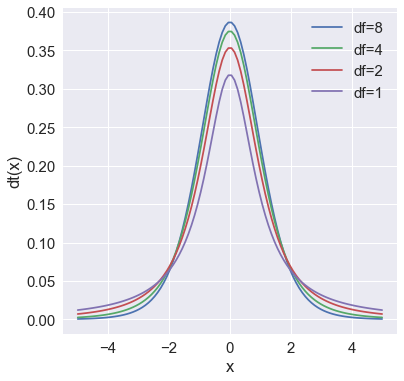

In [12]:
# t分布をプロット
x = np.linspace(-5,5,100)
t1 = scipy.stats.t.pdf(x, df=8) # dfは自由度
t2 = scipy.stats.t.pdf(x, df=4)
t3 = scipy.stats.t.pdf(x, df=2)
t4 = scipy.stats.t.pdf(x, df=1)

# 自由度が大きい凸になり裾も狭くなる
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, t1, label='df=8')
ax.plot(x, t2, label='df=4')
ax.plot(x, t3, label='df=2')
ax.plot(x, t4, label='df=1')
ax.set_xlabel('x')
ax.set_ylabel('dt(x)')
ax.legend()

例題
- 過去のデータの蓄積から「心理学テスト」の得点は平均`12`の正規分布に従う
- 「指導法データ」の20人の心理学テスト得点は，この母集団からの無作為標本と考えてよいか？

帰無仮説と対立仮説の設定
- 帰無仮説 $H_{0} : \mu = 12$
- 対立仮説 $H_{1} : \mu \neq 12$

In [13]:
population_mean = 12

検定統計量としてt統計量を選択

In [14]:
t = (df['psych_test'].mean() - population_mean) / (df['psych_test'].std() / np.sqrt(len(df['psych_test'])))
t

-2.616648017377738

有意水準 $\alpha$ を5%に設定

In [15]:
alpha = 0.05

帰無仮説の棄却 or 採択

In [16]:
# 自由度
dof = len(df['psych_test']) - 1
dof

19

In [17]:
prob_lower = scipy.stats.t.ppf(q=alpha/2, df=dof)
prob_upper = scipy.stats.t.ppf(q=(1-alpha/2), df=dof)
prob_lower, prob_upper

(-2.0930240544082634, 2.093024054408263)

In [18]:
# 帰無仮説が採択されるか
significant = prob_lower <= t <= prob_upper
significant

False

帰無仮説が棄却された → 心理学テストの母平均は12とはいえない

または， xxx を直接検定する → 5%未満のため帰無仮説が棄却される

In [33]:
scipy.stats.t.cdf?

Signature: scipy.stats.t.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/.anyenv/envs/pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [31]:
scipy.stats.t.cdf(x=df['psych_test'].mean(),
                  df=dof,
                  loc=population_mean,
                  scale=(df['psych_test'].std() / np.sqrt(len(df['psych_test']))))

0.0084854601347817207